# Fluctuating Intensities
## Read file from OMERO and analyse fluctuations of pixel intensities
Laura Cooper 19/05/2020

# 1. Connect to OMERO

In [1]:
#Import packages
from omero.gateway import BlitzGateway
import getpass
import numpy as np
from scipy import fft, ndimage
import matplotlib.pyplot as plt

In [83]:
username = input('Username: ') #Request user to enter OMERO username
password = getpass.getpass(prompt='Password: ') #Request user to enter OMERO password
conn = BlitzGateway(username, password, host='camdu.warwick.ac.uk', port=4064) #Use details to connect to OMERO server
conn.connect() #Returns true when connected

Username: u1675160
Password: ········


True

## Convert image stack to np.array

Function to convert OMERO image to numpy array:

In [84]:
def get_z_stack(img, c=0, t=0):
    """
    Convert OMERO image object to numpy array
    """
    zct_list = [(z, c, t) for z in range(img.getSizeZ())]
    pixels = image.getPrimaryPixels()
    return np.array(list(pixels.getPlanes(zct_list)))

## Get IDs for calling objects
Here we print the IDs for groups, owners, datasets and images from OMERO. We need these to call the images we want to analyse.

First the groups and owners:

List the datasets and their images:

In [85]:
Datasets=[8202, 8204, 8205, 8206, 8207]

In [86]:
print("\nList Datasets: \n", "=" * 50)
datasets = conn.getObjects("Dataset", opts={'owner': 3})
for obj in datasets:
    print("""%s%s:%s  Name:"%s" (owner=%s)""" % (
        " " * 2,
        obj.OMERO_CLASS,
        obj.getId(),
        obj.getName(),
        obj.getOwnerOmeName()
    ))
    #for img in dataset.listChildren():
    #    print("""%s%s:%s  Name:"%s" (owner=%s)""" % (
    #        " " * 2,
    #        img.OMERO_CLASS,
    #        img.getId(),
    #        img.getName(),
    #        img.getOwnerOmeName()
    #    ))
    test = dataset.listChildren()


List Datasets: 
  Dataset:8202  Name:"ER" (owner=mlsmaf)


NameError: name 'dataset' is not defined

In [87]:
print(test)

NameError: name 'test' is not defined

In [95]:
Fs=5.6; #Sample freqency
L=30 # Length of signal 
fd=Fs*np.arange(0,L/2,1)/L; #Freqency fomain\n",
u_bar = np.zeros([1,16])
u_rms = np.zeros([1,16])
P1_mean = np.zeros([15,16])
i=0;
for image in conn.getObjects('Image', opts={'dataset': 8204}):
    f = get_z_stack(image)
    # mean velocity over time for every pixel
    ind_u_bar=np.mean(f, axis = 0);
    u_bar[0,i]=np.mean(ind_u_bar, axis=(0,1))
    #print('The mean velocity over both time and space is:',np.mean(ind_u_bar, axis=(0,1)))
    # Reynolds decomposition to calculate turbulent fluctuations
    ind_u_fluct=np.subtract(f,ind_u_bar)
    ##Turblence Strength
    ind_u_rms=np.std(ind_u_fluct, axis = 0)
    u_rms[:,i] = np.mean(ind_u_rms, axis=(0,1))
    ##print('The mean turblence strength (in space) is:',np.mean(u_rms, axis=(0,1)))
    ind_u_fft=fft.fft(ind_u_fluct, axis = 0)
    P2=abs(ind_u_fft/L) #2 sided spectrum\n",
    P1=P2[0:int(L/2)]; #1 sided spectrum\n",
    P1[1:len(P1)-1]=2*P1[1:len(P1)-1];
    P1_mean[:,i]=np.mean(P1,axis=(1,2))
    i=i+1
    #fig, ax1 = plt.subplots()
    #plt.plot(fd,P1_mean) # comment out to plot on log scale
    #plt.plot(fd[1:],P1_mean[1:]) # uncomment to plot on log scale
    #plt.ylabel('Amplitude')
    #plt.xlabel('Frequency')
    #plt.yscale('log') # uncomment to plot on log scale
    #plt.show;

Every Image

u_bar: [[ 446.84791667 1418.42908333  241.58108333  945.92891667  768.53633333
  2178.81425    1885.5545      793.7615      317.10416667 2135.15841667
   252.6015     1513.21441667  687.86741667 1612.23491667  655.22466667
  1906.43575   ]]
u_rms: [[ 43.3000727  205.97723236  38.12977118 124.15793001  88.83271668
  245.91966885 247.23350321  81.75692361  37.91007572 208.69700922
   35.32483103 173.75731163  71.8769013  216.74095657  85.68277541
  234.14040892]]


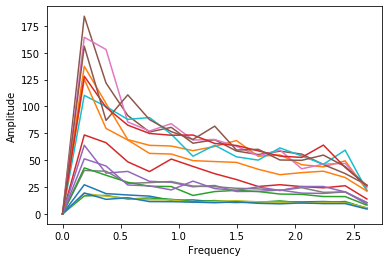

In [99]:
print("u_bar:",u_bar)
print("u_rms:",u_rms)
plt.plot(fd,P1_mean) # comment out to plot on log scale
#plt.plot(fd[1:],P1_mean[1:]) # uncomment to plot on log scale
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
#plt.yscale('log') # uncomment to plot on log scale
plt.show;

All images for one dataset

u_bar: 1109.9559270833333
u_rms: 133.71488052576746


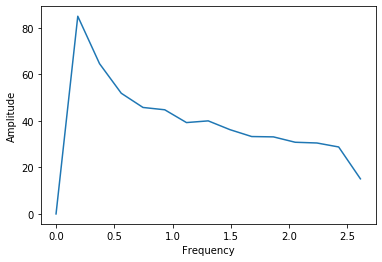

In [104]:
print("u_bar:",np.mean(u_bar))
print("u_rms:",np.mean(u_rms))
#print("P1_mean:",P1_mean)

plt.plot(fd,np.mean(P1_mean, axis=1)) # comment out to plot on log scale
#plt.plot(fd[1:],P1_mean[1:]) # uncomment to plot on log scale
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
#plt.yscale('log') # uncomment to plot on log scale
plt.show;